<a href="https://www.bigdatauniversity.com"><img src="https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width="400" align="center"></a>

<h1><center>Karar Ağaçları</center></h1>

Bu egzersizde, Karar ağacı sınıflandırma algoritmasını, hastaların tarihsel verilerinden ve bunların farklı ilaçlara verdikleri yanıttan bir model oluşturmak için kullanacaksınız. Ardından, bilinmeyen bir hastanın sınıfını tahmin etmek veya yeni bir hasta için uygun bir ilaç bulmak için eğitimli karar ağacını kullanacaksınız.

<h1>İçindekiler</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#about_dataset">Veriseti Hakkında</a></li>
        <li><a href="#pre-processing">Önişleme</a></li>
        <li><a href="#setting_up_tree">Karar ağacını oluşturma</a></li>
        <li><a href="#modeling">Model</a></li>
        <li><a href="#prediction">Tahmin</a></li>
        <li><a href="#evaluation">Değerlendirme</a></li>
        <li><a href="#visualization">Görselleştirme</a></li>
    </ol>
</div>
<br>
<hr>

Kütüphaneleri dahil edelim:
<ul>
    <li> <b>numpy (as np)</b> </li>
    <li> <b>pandas</b> </li>
    <li> <b>DecisionTreeClassifier</b> from <b>sklearn.tree</b> </li>
</ul>

In [1]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

<div id="about_dataset">
    <h2>Veriseti Hakkında</h2>
    Bir çalışma için veri toplayan bir tıbbi araştırmacı olduğunuzu hayal edin. Hepsi aynı hastalıktan muzdarip olan bir grup hasta hakkında veri topladınız. Tedavi süresince her hasta 5 ilaçtan birine, İlaç A, İlaç B, İlaç C, İlaç x ve y'ye cevap verdi.
    <br>
    <br>
   Amacınız, aynı hastalığı olan gelecekteki bir hasta için hangi ilacın uygun olabileceğini bulmak için bir model oluşturmaktır. Bu veri setinin özellik setleri Hastaların Yaş, Cinsiyet, Kan Basıncı ve Kolesterolüdür ve hedef her hastanın yanıt verdiği ilaçtır.
    <br>
 
</div>


Veriyi pandas dataframe olarak okuyalım:

In [2]:
my_data = pd.read_csv("drug200.csv", delimiter=",")
my_data[0:5]

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


<div id="practice"> 
    <h3>Pratik</h3> 
    Verinin Boyutu Nedir? 
</div>

In [3]:
# write your code here
my_data.shape





(200, 6)

<div href="pre-processing">
    <h2>Önişleme</h2>
</div>

Drug.csv dosyasından <b>my_data</b>yı kullanarak, aşağıdaki değişkenleri tanımlayalım: <br>

<ul>
    <li> <b> X </b> as the <b> Öznitelik Matrisi (Feature Matrix) </b> (data of my_data) </li>
    <li> <b> y </b> as the <b> Hedef veri vektörü (target) </b> </li>
</ul>

In [4]:
X = my_data[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
X[0:5]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.113999999999999],
       [28, 'F', 'NORMAL', 'HIGH', 7.797999999999999],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

Bu verisetinde bazı öznitelikler kategorik veri: __Sex__ veya __BP__. Sklearn Karar Ağaçları kategorik değişkenler üzerinde çalışmaz. Bunları nümerik değerlere çevrmeliyiz.

In [5]:
from sklearn import preprocessing
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
X[:,1] = le_sex.transform(X[:,1]) 


le_BP = preprocessing.LabelEncoder()
le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
X[:,2] = le_BP.transform(X[:,2])


le_Chol = preprocessing.LabelEncoder()
le_Chol.fit([ 'NORMAL', 'HIGH'])
X[:,3] = le_Chol.transform(X[:,3]) 

X[0:5]


array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.113999999999999],
       [28, 0, 2, 0, 7.797999999999999],
       [61, 0, 1, 0, 18.043]], dtype=object)

Hedef değişkeni tanımlayalım ve dolduralım:

In [6]:
y = my_data["Drug"]
y[0:5]

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

<hr>

<div id="setting_up_tree">
    <h2>Karar Ağacını Oluşturmak</h2>
    <b>train/test split</b> kullanacağız. Import <b>train_test_split</b> from <b>sklearn.cross_validation</b>.
</div>

In [7]:
from sklearn.model_selection import train_test_split

<b> train_test_split </b> 4 parametre döndürecek. Şöyle isimlendireceğiz:<br>
X_trainset, X_testset, y_trainset, y_testset <br> <br>
<b> train_test_split </b> şu parametreleri isteyecek: <br>
X, y, test_size=0.3, and random_state=3. <br> <br>
The <b>X</b> and <b>y</b> are the arrays required before the split, the <b>test_size</b> represents the ratio of the testing dataset, and the <b>random_state</b> ensures that we obtain the same splits.

In [8]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

<h3>Paratik</h3>
X_trainset ve y_trainset için boyutları bastıralım. Boyutların eşleşmesine dikkat edelim:

In [9]:
# your code
print(X_trainset.shape)
print(y_trainset.shape)


(140, 5)
(140,)


<hr>

<div id="modeling">
    <h2>Model</h2>
     <b>DecisionTreeClassifier</b> modelini oluşturup,  <b>drugTree</b> ismini vereceğiz.<br>
    Classifier içinde, <i> criterion="entropy" </i> olarak tanımlarsak, her bir düğümün entropi değerini gösteririz.
</div>

In [11]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree # it shows the default parameters

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Next, we will fit the data with the training feature matrix <b> X_trainset </b> and training  response vector <b> y_trainset </b>

In [12]:
drugTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

<hr>

<div id="prediction">
    <h2>Tahmin</h2>
    Test Datası üzerinde tahmin <b>predictions</b> yapalım ve tahminleri <b>predTree</b> değişkenine kaydedelim.
</div>

In [13]:
predTree = drugTree.predict(X_testset)

<b>predTree</b> ve <b>y_testset</b> değişkenlerinin print ederek, görsel olarak karşılaştırma yapabiliriz. 

In [14]:
print (predTree [0:5])
print (y_testset [0:5])


['drugY' 'drugX' 'drugX' 'drugX' 'drugX']
40     drugY
51     drugX
139    drugX
197    drugX
170    drugX
Name: Drug, dtype: object


<hr>

<div id="evaluation">
    <h2>Değerlendirme</h2>
     Sklearn'den <b>metrics</b> (metrikleri) dahil edip, modelin doğruluğunu hesaplayalım:  </div>

In [15]:
from sklearn import metrics
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))


DecisionTrees's Accuracy:  0.9833333333333333


In [16]:
print("Test set Confusion Matrice:\n", metrics.confusion_matrix(y_testset, predTree))

Test set Confusion Matrice:
 [[ 7  0  0  0  0]
 [ 0  5  0  0  0]
 [ 0  0  5  0  0]
 [ 0  0  0 20  1]
 [ 0  0  0  0 22]]


In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_testset, predTree))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         7
       drugB       1.00      1.00      1.00         5
       drugC       1.00      1.00      1.00         5
       drugX       1.00      0.95      0.98        21
       drugY       0.96      1.00      0.98        22

   micro avg       0.98      0.98      0.98        60
   macro avg       0.99      0.99      0.99        60
weighted avg       0.98      0.98      0.98        60



In [18]:
from sklearn.model_selection import cross_val_score

#create a new DT model
drugTree_cv = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

#train model with cv of 5 
cv_scores = cross_val_score(drugTree_cv, X, y, cv=5)

#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[1.         1.         1.         0.94871795 1.        ]
cv_scores mean:0.9897435897435898


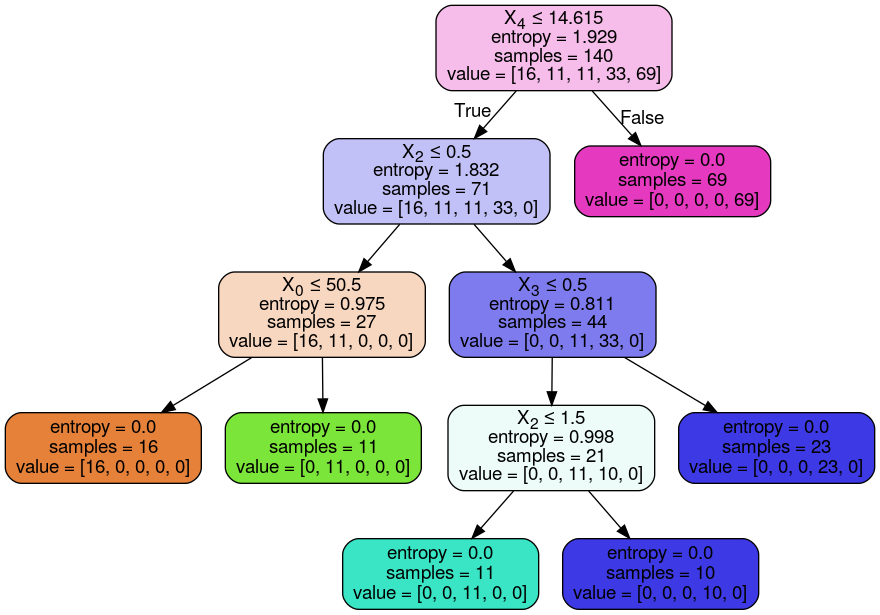

In [22]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()

export_graphviz(drugTree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [32]:
y_trainset.value_counts()

drugY    69
drugX    33
drugA    16
drugB    11
drugC    11
Name: Drug, dtype: int64

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

<p>Copyright &copy; 2018 <a href="https://cocl.us/DX0108EN_CC">Cognitive Class</a>. This notebook and its source code are released under the terms of the <a href="https://bigdatauniversity.com/mit-license/">MIT License</a>.</p>